In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import IPython as ip

In [2]:
mpl.style.use('ggplot')
mpl.rc('figure', figsize=(8.0, 5.5))
mpl.rc('font', family='Noto Sans CJK TC')
ip.display.set_matplotlib_formats('svg')

In [3]:
from pathlib import Path

# path: the path relative to desktop
def plt_savefig(path):

    return plt.savefig(
        (Path('~/Desktop') / path).expanduser(),
        bbox_inches='tight',  # or the labels will be cut
        dpi=600
    )

In [4]:
df_fair = sm.datasets.fair.load_pandas().data

In [5]:
df = df_fair
# 2: poor
# 3: fair
df = df.assign(poor_marriage_yn
               =(df.rate_marriage <= 2),
               affairs_yn=(df.affairs > 0))
df_fair_2 = df

In [6]:
df = df_fair_2

df = (df
      .groupby(['poor_marriage_yn', 'affairs_yn'])
      [['affairs']]
      .count()
      .unstack()
      .droplevel(axis=1, level=0))

df_pct = df.apply(axis=1, func=lambda r: r/r.sum())

display(df, df_pct)

print('p-value:',
      sp.stats.chi2_contingency(
          df,
          correction=False
      )[1])

df_crosstab_1 = df
df_crosstab_1_pct = df_pct

affairs_yn        False  True 
poor_marriage_yn              
False              4161   1758
True                152    295

affairs_yn           False     True 
poor_marriage_yn                    
False             0.702990  0.297010
True              0.340045  0.659955

p-value: 1.9460298519537103e-56


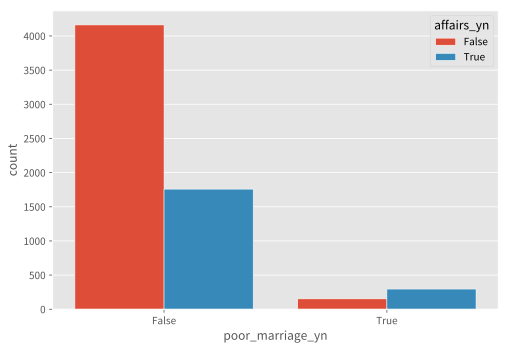

In [7]:
df = df_fair_2
sns.countplot(data=df,
              x='poor_marriage_yn', hue='affairs_yn',
              saturation=0.95, edgecolor='white')

# plt_savefig('countplot_poor_marriage_yn_affairs_yn.png')

In [8]:
# df = df_crosstab_1
# sns.heatmap(df,
#             center=1000, square=True,
#             annot=True, fmt='d')

In [9]:
# df = df_crosstab_1_pct
# sns.heatmap(df,
#             center=0,square=True,
#             annot=True, fmt='.2f')

In [10]:
df = df_fair_2
# 2: farming-like
# 3: white-colloar
df = df[df.occupation.isin([2, 3])]
df_fair_3 = df

In [11]:
df = df_fair_3

df = (df
      .groupby(['occupation', 'affairs_yn'])
      [['affairs']]
      .count()
      .unstack()
      .droplevel(axis=1, level=0))

df_pct = df.apply(axis=1, func=lambda r: r/r.sum())

display(df, df_pct)

print('p-value:',
      sp.stats.chi2_contingency(
          df,
          correction=False
      )[1])

df_crosstab_2 = df
df_crosstab_2_pct = df_pct

affairs_yn  False  True 
occupation              
2.0           607    252
3.0          1818    965

affairs_yn     False     True 
occupation                    
2.0         0.706636  0.293364
3.0         0.653252  0.346748

p-value: 0.0037369587127306517


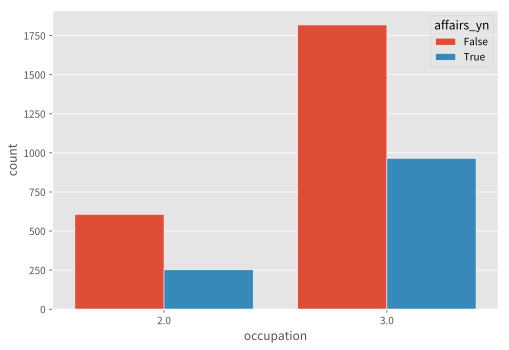

In [12]:
df = df_fair_3
sns.countplot(data=df,
              x='occupation', hue='affairs_yn',
              saturation=0.95, edgecolor='white')

# plt_savefig('countplot_occupation23_affairs_yn.png')

In [13]:
# df = df_crosstab_2
# sns.heatmap(df,
#             center=1000, square=True,
#             annot=True, fmt='d')

In [14]:
# df = df_crosstab_2_pct
# sns.heatmap(df,
#             center=0,square=True,
#             annot=True, fmt='.2f')

In [15]:
print('p-value:',
      sp.stats.chi2_contingency(
          [[607, 252],
           [1818, 965]],
          correction=False
      )[1])

p-value: 0.0037369587127306517
